## 1. Why Databases?

- Aim : get a short introduction into using databases and using databases with python

- Dutch Vegetation Database

![](https://github.com/komazsofi/usingdatabases/blob/master/figures/db.PNG?raw=true)

- Tasks: 
	* ask all the observation which was observed on a selected location
	* calculate species richness
	* find all the information where English oak (Quercus robur) is presented
	* how many observation per habitats is exist


## 2. Basic SQL queries (PostgreSQL - pgAdmin)

- ask all the observation which was observed on a selected location


- calculate species richness


- find all the information where English oak (Quercus robur) is presented


- how many observation per habitats is exist



## 3. How to handle a database within python?

### Basic code to use database from python (how to downloand the data from database)

In [1]:
import psycopg2 as dbapi2
import numpy as np
import pandas as pd

db = dbapi2.connect(host="localhost", database="postgres", user="user", password="local")
cur = db.cursor()
cur.execute("select * from observation where observation.polygonid=100");
result = cur.fetchall()
cur.close()
db.close()

print(len(result))
print(result)

38


### List to numpy array

In [3]:
print(result)
result_array=np.array(result)
print(result_array)

[(100, 9220780, 2011, 1.0), (100, 2705308, 2011, 1.0), (100, 7760886, 2011, 1.0), (100, 7924597, 2011, 1.0), (100, 2704922, 2011, 1.0), (100, 5369652, 2011, 1.0), (100, 2926557, 2011, 1.0), (100, 8351737, 2011, 1.0), (100, 3034830, 2011, 1.0), (100, 2706164, 2011, 1.0), (100, 5371742, 2011, 1.0), (100, 3134857, 2011, 1.0), (100, 5384795, 2011, 1.0), (100, 5341170, 2011, 1.0), (100, 5290149, 2011, 1.0), (100, 8208358, 2011, 1.0), (100, 8300875, 2011, 1.0), (100, 2704505, 2011, 1.0), (100, 3033363, 2011, 1.0), (100, 2995209, 2011, 1.0), (100, 8195144, 2011, 1.0), (100, 3034620, 2011, 1.0), (100, 5384604, 2011, 1.0), (100, 7960979, 2011, 1.0), (100, 2888763, 2011, 1.0), (100, 3172048, 2011, 1.0), (100, 2703777, 2011, 1.0), (100, 2703647, 2011, 1.0), (100, 3189870, 2011, 1.0), (100, 3189870, 2011, 1.0), (100, 3189870, 2011, 1.0), (100, 3046258, 2011, 1.0), (100, 2679898, 2011, 1.0), (100, 5281901, 2011, 1.0), (100, 6364031, 2011, 1.0), (100, 7792960, 2011, 1.0), (100, 2876213, 2011, 1.0), 

### Write a function!!!!

## 4. Visualization

### How many observation per habitats is exist --> visualize it!!!

In [4]:
db = dbapi2.connect(host="localhost", database="postgres", user="user", password="local")
cur = db.cursor()
cur.execute("select habitat, count(polygonid) from plot group by habitat");
habitat = cur.fetchall()
cur.close()
db.close()

print(habitat)

[('Open water', 651L), ('Grassland (not salty)', 4974L), ('Forest', 2151L), ('Brushwood', 859L), ('Wet pionier environment', 488L), ('Dry disturbed environment', 751L), ('Saltmarch', 1711L), ('Heathland', 1155L), ('Marsh', 1353L), ('Fringes & tall forb vegetation', 1575L)]


### Create a bar plot

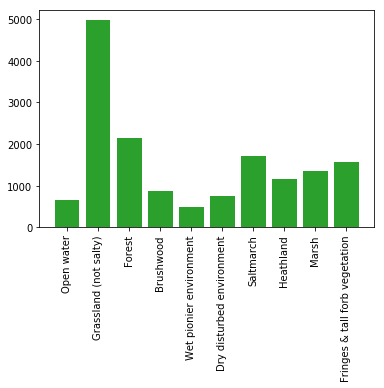

In [10]:
import matplotlib.pyplot as plt

habitat_array=np.array(habitat)
y_pos=np.arange(len((habitat_array[:,0])))

plt.bar(y_pos,habitat_array[:,1].astype(np.float))
plt.xticks(y_pos,habitat_array[:,0],rotation="vertical")
plt.show()



In [13]:
sqlcommand="select * from observation where observation.polygonid=100"

def connectiondb(sqlcommand,host="localhost", database="postgres", user="user", password="local"):
    db = dbapi2.connect(host=host, database=database, user=user, password=password)
    cur = db.cursor()
    cur.execute(sqlcommand);
    result = cur.fetchall()
    cur.close()
    db.close()
    return np.array(result)

result=connectiondb(sqlcommand)

print(len(result))

38
